## Data load

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# train, test 데이터 shape
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

train_label = df_train['SalePrice']
ids = df_test["Id"]
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

# EDA & Preprocessing - continuous variable

In [4]:
# 연속형변수와 Label 의 상관관계

df_train.corr()["SalePrice"].abs().sort_values()

BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
3SsnPorch        0.044584
MoSold           0.046432
OverallCond      0.077856
MSSubClass       0.084284
PoolArea         0.092404
ScreenPorch      0.111447
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

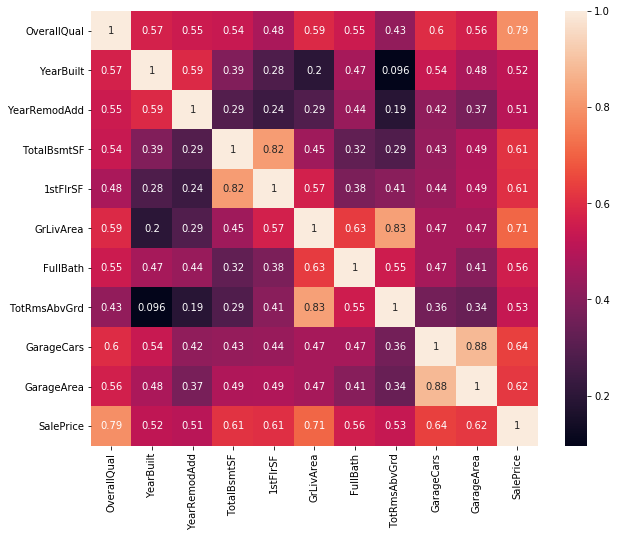

In [5]:
## 상관계수 0.5 이상인 놈들 
corr_mat = df_train.corr()
high_corr_features = corr_mat.index[corr_mat["SalePrice"].abs() > 0.5]
plt.figure(figsize=(10,8))
sns.heatmap(df_train[high_corr_features].corr(), annot=True)

### 하나하나씩 살펴보자 - 데이터 전처리를 위해 일단 train, test  합쳐줌

In [6]:
# label 지우고 
df_train = df_train.drop(["SalePrice"], axis=1)
# train, test 합치고
all_data = pd.concat([df_train, df_test], ignore_index=True)
# Id 변수 버린다
all_data = all_data.drop(['Id'],axis=1)

all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### 결측치가 200개 이상이면 일단 버린다 

In [7]:
nans=pd.isnull(all_data).sum()
nans[nans>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [8]:
# 10% 이상 결측치 존재하는 feature 제거 
#all_data=all_data.drop("Id", 1)
all_data=all_data.drop("Alley", 1)
all_data=all_data.drop("Fence", 1)
all_data=all_data.drop("MiscFeature", 1)
all_data=all_data.drop("PoolQC", 1)
all_data=all_data.drop("FireplaceQu", 1)
all_data=all_data.drop("LotFrontage", 1)

### continuous vs categorical

In [9]:
numeric = all_data.dtypes[all_data.dtypes != "object"].index
numeric



Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [10]:
categorical = all_data.dtypes[all_data.dtypes == "object"].index
categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### numeric variable 에 대한 결측치 처리 - median

In [11]:
for feature in numeric:    
    if all_data[feature].isnull().sum() / all_data.shape[0] != 0.0:
        all_data.loc[all_data[feature].isnull(),str(feature)] = all_data[feature].median()

In [12]:
for feature in numeric:    
    print(feature,': ',all_data[feature].isnull().sum() / all_data.shape[0])


MSSubClass :  0.0
LotArea :  0.0
OverallQual :  0.0
OverallCond :  0.0
YearBuilt :  0.0
YearRemodAdd :  0.0
MasVnrArea :  0.0
BsmtFinSF1 :  0.0
BsmtFinSF2 :  0.0
BsmtUnfSF :  0.0
TotalBsmtSF :  0.0
1stFlrSF :  0.0
2ndFlrSF :  0.0
LowQualFinSF :  0.0
GrLivArea :  0.0
BsmtFullBath :  0.0
BsmtHalfBath :  0.0
FullBath :  0.0
HalfBath :  0.0
BedroomAbvGr :  0.0
KitchenAbvGr :  0.0
TotRmsAbvGrd :  0.0
Fireplaces :  0.0
GarageYrBlt :  0.0
GarageCars :  0.0
GarageArea :  0.0
WoodDeckSF :  0.0
OpenPorchSF :  0.0
EnclosedPorch :  0.0
3SsnPorch :  0.0
ScreenPorch :  0.0
PoolArea :  0.0
MiscVal :  0.0
MoSold :  0.0
YrSold :  0.0


### Skewness 측정 , 양수 = right skewed = right tail

In [13]:
from scipy import stats
from scipy.stats import norm, skew

In [14]:
for feature in numeric:    
    print(feature,': ',all_data[feature].skew())


MSSubClass :  1.3761646373261713
LotArea :  12.829024853018762
OverallQual :  0.19721180528040133
OverallCond :  0.5706053117352524
YearBuilt :  -0.6001139748696814
YearRemodAdd :  -0.45125229728739846
MasVnrArea :  2.6149360706240214
BsmtFinSF1 :  1.4261107660173202
BsmtFinSF2 :  4.148275267275402
BsmtUnfSF :  0.9201757246843627
TotalBsmtSF :  1.1632139475611367
1stFlrSF :  1.4703601055379227
2ndFlrSF :  0.8621178325657642
LowQualFinSF :  12.094977192517302
GrLivArea :  1.2700104075191514
BsmtFullBath :  0.6251534098798688
BsmtHalfBath :  3.9336155129159094
FullBath :  0.16769191818882379
HalfBath :  0.6949236492716564
BedroomAbvGr :  0.32649214927079917
KitchenAbvGr :  4.304466641562935
TotRmsAbvGrd :  0.7587568676624701
Fireplaces :  0.733871770878103
GarageYrBlt :  -0.39878074412768655
GarageCars :  -0.21870492080546935
GarageArea :  0.24130766693239572
WoodDeckSF :  1.8433802126628294
OpenPorchSF :  2.5364173160468444
EnclosedPorch :  4.005950070504265
3SsnPorch :  11.381914394786

### 아래 그림에서 애들의 분포를 찍어볼 수 있음 

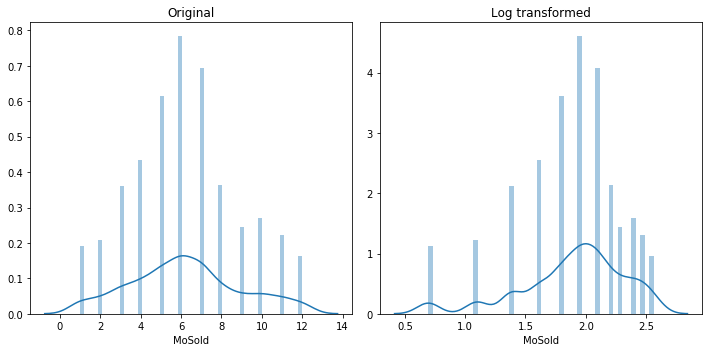

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(all_data['MoSold'], bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(np.log1p(all_data['MoSold']), bins=50)
plt.title('Log transformed')

plt.tight_layout()

In [16]:
#연속형 변수들중 right_skewed 한해서 log변환 
# LotArea,BsmtFinSF1, GrLivArea, 1stFlrSF, OpenPorchSF

all_data['LotArea'] = np.log1p(all_data['LotArea'])
all_data['BsmtFinSF1'] = np.log1p(all_data['BsmtFinSF1'])
all_data['GrLivArea'] = np.log1p(all_data['GrLivArea'])
all_data['1stFlrSF'] = np.log1p(all_data['1stFlrSF'])
all_data['OpenPorchSF'] = np.log1p(all_data['OpenPorchSF'])


### numeric 변수 업데이트

In [17]:
numeric = all_data.dtypes[all_data.dtypes != "object"].index
numeric

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

---

### 화장실관련

### 욕조 있는 + 욕조 없는 = 총 화장실 갯수 

### 욕조 있는 / 총 화장실 갯수 = 연속형 변수로 표현 가능 (지하, 지상 각각)

- BsmtFullBath: 욕조 있는 최하층 화장실 개수 ,BsmtHalfBath : 욕조 없는 최하층 화장실 개수

- FullBath: 욕조 있는 지상 화장실 개수 , HalfBath : 욕조 없는 지상 화장실 개수

In [18]:
all_data['all_bath'] = all_data['BsmtFullBath'] + all_data['BsmtHalfBath']
all_data['ratio_bath'] = all_data['BsmtFullBath'] / all_data['all_bath']
all_data['ratio_bath'].fillna(0.0, inplace=True)

del all_data['BsmtFullBath']
del all_data['BsmtHalfBath']
del all_data['all_bath']

all_data['ratio_bath'].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: ratio_bath, dtype: float64

In [19]:
all_data['all_bath'] = all_data['FullBath'] + all_data['HalfBath']
all_data['ratio_bath_abgr'] = all_data['FullBath'] / all_data['all_bath']
all_data['ratio_bath_abgr'].fillna(0.0, inplace=True)

del all_data['FullBath']
del all_data['HalfBath']
del all_data['all_bath']

all_data['ratio_bath_abgr'].head()

0    0.666667
1    1.000000
2    0.666667
3    1.000000
4    0.666667
Name: ratio_bath_abgr, dtype: float64

--- 

### 침실 부억 방 총갯수

### 침실 + 부억 = 방갯수

### 침실/방갯수 = 연속형 변수로 표현 가능 

- BedroomAbvGr: 지상 침실 갯수

- KitchenAbvGr: 지상 부억 갯수

- TotRmsAbvGrd: 지상 방 총 갯수 ( 화장실제외)

In [20]:
all_data['ratio_bed'] = all_data['BedroomAbvGr'] / all_data['TotRmsAbvGrd']
all_data['ratio_bed'].fillna(0.0, inplace=True)

del all_data['BedroomAbvGr']
del all_data['KitchenAbvGr']
del all_data['TotRmsAbvGrd']

all_data['ratio_bed'].head()

0    0.375000
1    0.500000
2    0.500000
3    0.428571
4    0.444444
Name: ratio_bed, dtype: float64

### 차량 댓수, 차고 면적 -> 사실 차고 면적이 넓으면 차고 수용 가능한 차량 대수가 높을 것이므로 차고면적만 살린다 

- GarageCars: 차고 수용 가능 차량 대수 

- GarageArea: 차고 면적 

In [21]:
del all_data['GarageCars']

### 수영장 넓이는 중요할거 같음  - > one hot 

- PoolArea: 수영장 넓이 

In [22]:
def one_hot(x):
    if x == 0:
        return 0
    else:
        return 1
    

In [23]:
all_data['has_pool'] = all_data['PoolArea'].apply(one_hot)

del all_data['PoolArea']
all_data['has_pool'].head()

0    0
1    0
2    0
3    0
4    0
Name: has_pool, dtype: int64

### 마감 안좋은 곳의 면적이 0 이냐 이상이냐 -> one hot  
- LowQualFinSF: 마감 안 좋은곳 면적.. 

In [24]:
all_data['LowQual'] = all_data['LowQualFinSF'].apply(one_hot)

del all_data['LowQualFinSF']
all_data['LowQual'].head()

0    0
1    0
2    0
3    0
4    0
Name: LowQual, dtype: int64

### 년도 관련 

- GarageYrBlt : 차고 건설 년도는 재건축년도와 중복될 가능성이 있어 제거 

In [25]:
del all_data['GarageYrBlt']

- 이 외 판매월, 년도는 제거 

In [26]:
del all_data['MoSold']
del all_data['YrSold']

### numeric 변수 업데이트

In [27]:
numeric = all_data.dtypes[all_data.dtypes != "object"].index
numeric

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'ratio_bath', 'ratio_bath_abgr', 'ratio_bed',
       'has_pool', 'LowQual'],
      dtype='object')

In [28]:
for feature in numeric:
    print(feature,': ', all_data[feature].isnull().sum() / all_data.shape[0])


MSSubClass :  0.0
LotArea :  0.0
OverallQual :  0.0
OverallCond :  0.0
YearBuilt :  0.0
YearRemodAdd :  0.0
MasVnrArea :  0.0
BsmtFinSF1 :  0.0
BsmtFinSF2 :  0.0
BsmtUnfSF :  0.0
TotalBsmtSF :  0.0
1stFlrSF :  0.0
2ndFlrSF :  0.0
GrLivArea :  0.0
Fireplaces :  0.0
GarageArea :  0.0
WoodDeckSF :  0.0
OpenPorchSF :  0.0
EnclosedPorch :  0.0
3SsnPorch :  0.0
ScreenPorch :  0.0
MiscVal :  0.0
ratio_bath :  0.0
ratio_bath_abgr :  0.0
ratio_bed :  0.0
has_pool :  0.0
LowQual :  0.0


# EDA & Preprocessing - categorical variable

In [29]:
for feature in categorical:    
    print(feature,': ',all_data[feature].isnull().sum() / all_data.shape[0])

MSZoning :  0.0013703323055841042
Street :  0.0
LotShape :  0.0
LandContour :  0.0
Utilities :  0.0006851661527920521
LotConfig :  0.0
LandSlope :  0.0
Neighborhood :  0.0
Condition1 :  0.0
Condition2 :  0.0
BldgType :  0.0
HouseStyle :  0.0
RoofStyle :  0.0
RoofMatl :  0.0
Exterior1st :  0.00034258307639602604
Exterior2nd :  0.00034258307639602604
MasVnrType :  0.008221993833504625
ExterQual :  0.0
ExterCond :  0.0
Foundation :  0.0
BsmtQual :  0.02774922918807811
BsmtCond :  0.028091812264474134
BsmtExposure :  0.028091812264474134
BsmtFinType1 :  0.027064063035286058
BsmtFinType2 :  0.027406646111682084
Heating :  0.0
HeatingQC :  0.0
CentralAir :  0.0
Electrical :  0.00034258307639602604
KitchenQual :  0.00034258307639602604
Functional :  0.0006851661527920521
GarageType :  0.05378554299417609
GarageFinish :  0.05447070914696814
GarageQual :  0.05447070914696814
GarageCond :  0.05447070914696814
PavedDrive :  0.0
SaleType :  0.00034258307639602604
SaleCondition :  0.0


### 결측치를 최빈값으로 채워주자

In [30]:
for feature in categorical:    
    all_data[feature].fillna(all_data[feature].mode()[0], inplace=True)


In [31]:
for feature in categorical:
    print(feature,': ', all_data[feature].isnull().sum() / all_data.shape[0])


MSZoning :  0.0
Street :  0.0
LotShape :  0.0
LandContour :  0.0
Utilities :  0.0
LotConfig :  0.0
LandSlope :  0.0
Neighborhood :  0.0
Condition1 :  0.0
Condition2 :  0.0
BldgType :  0.0
HouseStyle :  0.0
RoofStyle :  0.0
RoofMatl :  0.0
Exterior1st :  0.0
Exterior2nd :  0.0
MasVnrType :  0.0
ExterQual :  0.0
ExterCond :  0.0
Foundation :  0.0
BsmtQual :  0.0
BsmtCond :  0.0
BsmtExposure :  0.0
BsmtFinType1 :  0.0
BsmtFinType2 :  0.0
Heating :  0.0
HeatingQC :  0.0
CentralAir :  0.0
Electrical :  0.0
KitchenQual :  0.0
Functional :  0.0
GarageType :  0.0
GarageFinish :  0.0
GarageQual :  0.0
GarageCond :  0.0
PavedDrive :  0.0
SaleType :  0.0
SaleCondition :  0.0


### 분포가 어떤지 살펴본다

In [32]:
for i in all_data[categorical]:
    print(i,': \n',all_data[i].value_counts(),'\n') 

MSZoning : 
 RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64 

Street : 
 Pave    2907
Grvl      12
Name: Street, dtype: int64 

LotShape : 
 Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64 

LandContour : 
 Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64 

Utilities : 
 AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64 

LotConfig : 
 Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64 

LandSlope : 
 Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64 

Neighborhood : 
 NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmn

### 한쪽 범주로 쏠린 feature들을 제거( 한 범주 2000 이상)|

In [33]:
del_list=[]
for i in all_data[categorical]:
    if max(all_data[i].value_counts()) > 2000:
        del_list.append(i)
del_list

['MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [34]:
all_data.drop(columns=del_list,axis=1,inplace=True)

### categorical 업데이트

In [35]:
categorical = all_data.dtypes[all_data.dtypes == "object"].index
categorical

Index(['LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
       'GarageFinish'],
      dtype='object')

In [36]:
all_data.shape

(2919, 42)

### 더미화

In [37]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2919, 141)

# modeling

In [38]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [39]:
X_train = all_data[:df_train.shape[0]]
X_label = train_label

X_test = all_data[df_train.shape[0]:]
test_id = ids

In [40]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, X_label, test_size=0.2, random_state=2018)
y_tr.shape, y_vld.shape

((1168,), (292,))

In [41]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_tr, y_tr)
train_predict = lr.predict(X_vld)
train_rmse = np.sqrt(mean_squared_error(train_predict, y_vld))
print("RMSE of Linear Regression:", train_rmse)

RMSE of Linear Regression: 34303.850285884975


In [42]:
#LASSO
lasso = Lasso(alpha =0.0001, random_state=1)
lasso.fit(X_tr, y_tr)
train_predict = lasso.predict(X_vld)
train_rmse = np.sqrt(mean_squared_error(train_predict, y_vld))
print("RMSE of LASSO:", train_rmse)

RMSE of LASSO: 34304.4969571612


/Users/sungjinpark/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [43]:
#Elastic Net
elastic = ElasticNet(alpha=0.001, l1_ratio=0.9, random_state=1)
elastic.fit(X_tr, y_tr)
train_predict = elastic.predict(X_vld)
train_rmse = np.sqrt(mean_squared_error(train_predict, y_vld))
print("RMSE of Elastic Net:", train_rmse)

RMSE of Elastic Net: 34277.546431291914


/Users/sungjinpark/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [44]:
#Gradient Boost
gboost = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
gboost.fit(X_tr, y_tr)
train_predict = gboost.predict(X_vld)
train_rmse = np.sqrt(mean_squared_error(train_predict, y_vld))
print("RMSE of Gradient Boost:", train_rmse)

RMSE of Gradient Boost: 33942.87677423623


### 무언가 잘못되었음 ...

In [45]:
## 상관계수 체크 
X_check=X_train.assign(SalePrice=X_label)
corrr = X_check.corr().SalePrice
df=corrr.abs().sort_values()
df

Foundation_Wood         0.002711
BsmtFinSF2              0.011378
Foundation_Stone        0.012103
Neighborhood_SawyerW    0.014560
Exterior2nd_Stone       0.016754
Exterior1st_Plywood     0.017719
Neighborhood_Blmngtn    0.019066
Neighborhood_Blueste    0.020250
MiscVal                 0.021190
Neighborhood_NWAmes     0.023483
GarageType_2Types       0.023974
Exterior2nd_AsphShn     0.024524
Exterior2nd_BrkFace     0.024759
Exterior2nd_CBlock      0.025028
Exterior1st_CBlock      0.025028
HouseStyle_2.5Unf       0.025856
Exterior1st_AsphShn     0.026677
Exterior1st_ImStucc     0.026729
GarageType_Basment      0.029425
Exterior1st_Stucco      0.029802
HeatingQC_Po            0.030962
Exterior1st_BrkFace     0.032371
Neighborhood_Gilbert    0.035940
Exterior1st_Stone       0.036181
HouseStyle_2.5Fin       0.036526
LotShape_IR3            0.036720
Neighborhood_NPkVill    0.037910
HouseStyle_SLvl         0.038645
Exterior2nd_Wd Shng     0.040329
Exterior2nd_Stucco      0.042416
          

In [46]:
del_list=[]
for idx,val in enumerate(df):
    if val <0.1:
        del_list.append(df.index[idx])
del_list

['Foundation_Wood',
 'BsmtFinSF2',
 'Foundation_Stone',
 'Neighborhood_SawyerW',
 'Exterior2nd_Stone',
 'Exterior1st_Plywood',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'MiscVal',
 'Neighborhood_NWAmes',
 'GarageType_2Types',
 'Exterior2nd_AsphShn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior1st_CBlock',
 'HouseStyle_2.5Unf',
 'Exterior1st_AsphShn',
 'Exterior1st_ImStucc',
 'GarageType_Basment',
 'Exterior1st_Stucco',
 'HeatingQC_Po',
 'Exterior1st_BrkFace',
 'Neighborhood_Gilbert',
 'Exterior1st_Stone',
 'HouseStyle_2.5Fin',
 'LotShape_IR3',
 'Neighborhood_NPkVill',
 'HouseStyle_SLvl',
 'Exterior2nd_Wd Shng',
 'Exterior2nd_Stucco',
 'BsmtExposure_Mn',
 'MasVnrType_BrkCmn',
 '3SsnPorch',
 'Exterior2nd_Other',
 'Exterior2nd_Brk Cmn',
 'LowQual',
 'Exterior1st_BrkComm',
 'Exterior1st_WdShing',
 'Exterior2nd_Plywood',
 'Neighborhood_ClearCr',
 'Neighborhood_Mitchel',
 'HouseStyle_1Story',
 'Neighborhood_Veenker',
 'Neighborhood_SWISU',
 'Exterior2nd_HdBoard',
 'Gara

### 0.1 도 안넘는 양심없는 피쳐는 제거 

In [47]:
all_data.drop(columns=del_list,axis=1,inplace=True)

### 다시 도전

In [48]:
X_train = all_data[:df_train.shape[0]]
X_label = train_label

X_test = all_data[df_train.shape[0]:]
test_id = ids

In [49]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, X_label, test_size=0.2, random_state=2018)
y_tr.shape, y_vld.shape

((1168,), (292,))

In [50]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_tr, y_tr)
train_predict = lr.predict(X_vld)
train_rmse = np.sqrt(mean_squared_error(train_predict, y_vld))
print("RMSE of Linear Regression:", train_rmse)

RMSE of Linear Regression: 35527.00375489493


In [51]:
#LASSO
lasso = Lasso(alpha =0.0001, random_state=1)
lasso.fit(X_tr, y_tr)
train_predict = lasso.predict(X_vld)
train_rmse = np.sqrt(mean_squared_error(train_predict, y_vld))
print("RMSE of LASSO:", train_rmse)

RMSE of LASSO: 35527.212508170385


/Users/sungjinpark/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [52]:
#Elastic Net
elastic = ElasticNet(alpha=0.001, l1_ratio=0.9, random_state=1)
elastic.fit(X_tr, y_tr)
train_predict = elastic.predict(X_vld)
train_rmse = np.sqrt(mean_squared_error(train_predict, y_vld))
print("RMSE of Elastic Net:", train_rmse)

RMSE of Elastic Net: 35516.331412873245


/Users/sungjinpark/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [53]:
#Gradient Boost
gboost = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
gboost.fit(X_tr, y_tr)
train_predict = gboost.predict(X_vld)
train_rmse = np.sqrt(mean_squared_error(train_predict, y_vld))
print("RMSE of Gradient Boost:", train_rmse)

RMSE of Gradient Boost: 34079.465965452255


## 그나마 boost 계열이 잘먹히니깐 Tree 기반으로 모델링 해봄

In [1]:
import xgboost as xgb
import lightgbm as lgb


/Users/sungjinpark/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [64]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_tr,
         y_tr)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   21.9s finished


0.8608433541948277
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [65]:
#Gradient Boost
xgb_model = xgb.XGBRegressor(max_depth=5,min_child_weight=4,n_estimators=500,
                          nthread=4,colsample_bytree=0.7,silent=1,subsample=0.7,learning_rate=0.05)
xgb_model.fit(X_train, X_label)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.7)

In [66]:
test_predict = xgb_model.predict(X_test)


In [67]:
test_predict

array([126017.43, 155753.84, 181279.23, ..., 157957.22, 111498.  ,
       218872.38], dtype=float32)

In [70]:
submission = pd.DataFrame({'Id':ids,'SalePrice':test_predict})
submission.to_csv('Chad_sample.csv',index=False, encoding='utf-8-sig')